In [1]:
''' here we are going to predict the fake loans 
 with the help of python , we are going to tell which model is better and 
 based on that model we are going to design a website for predicting fake loan 
 '''
# steps to carry out for designing this project 

'''
  * Loading and exploring the dataset
   * working with missing values 
   * dropping unnecessary datas
   * visualization or making a model board
    * encoding the categorical data
    * Model development
     --  Dividing the data for train and test 
     --   Using GaussianNB
      --   Loss Function
       --  Using SVC(Support Vector Classifier ) with GridSearchCV
       --  XGBoost Classifier 
       -- Decision Tree using Randomized Search 
       -- Random Forest using Randomized Search
       
       
       * Selecting and saving a model 
       * Coding for the website
'''

'\n  * Loading and exploring the dataset\n   * working with missing values \n   * dropping unnecessary datas\n   * visualization or making a model board\n    * encoding the categorical data\n    * Model development\n     --  Dividing the data for train and test \n     --   Using GaussianNB\n      --   Loss Function\n       --  Using SVC(Support Vector Classifier ) with GridSearchCV\n       --  XGBoost Classifier \n       -- Decision Tree using Randomized Search \n       -- Random Forest using Randomized Search\n       \n       \n       * Selecting and saving a model \n       * Coding for the website\n'

In [2]:
# importing necessary libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [3]:
# Loading and exploring the dataset 
train_data = pd.read_csv("C:/Users/balam/OneDrive/Documents/Fake Loan Prediction Dataset/train_u6lujuX_CVtuZ9i.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(train_data.shape)

(614, 13)


In [5]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
def missing_null(df):
    a = df.isnull().sum()
    return a

In [7]:
missing_null(train_data)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
### removing unnecessary columns
train_data.drop(["Loan_ID","Dependents"],axis=1,inplace=True)
train_data



,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
# Dealing with categorical values

train_data.shape





(614, 11)

In [11]:
# dealing with null values [categorical values]
cols = train_data[["Gender","Married","Self_Employed"]]

for i in cols:
    train_data[i].fillna(train_data[i].mode().iloc[0],inplace=True)
# replacing with mode 


In [12]:
train_data.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# now dealing with missing numerical data 

colds1 = train_data[["LoanAmount","Loan_Amount_Term","Credit_History"]]

for j in colds1:
    train_data[j].fillna(train_data[j].mean(axis=0),inplace=True)
    

In [14]:
train_data.isnull().sum() # now checking there is no null values are present

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# now visualization 
def barplot(col):
    Approved = train_data[train_data["Loan_Status"]=="Y"][col].value_counts()
    Disapproved = train_data[train_data["Loan_Status"]=="N"][col].value_counts()
    
    # now creating the dataframe for approved and disapproved datas
    dfr = pd.DataFrame([Approved,Disapproved])
    dfr.index = ["Approved","Disapproved"]
    dfr.plot(kind="bar")
    

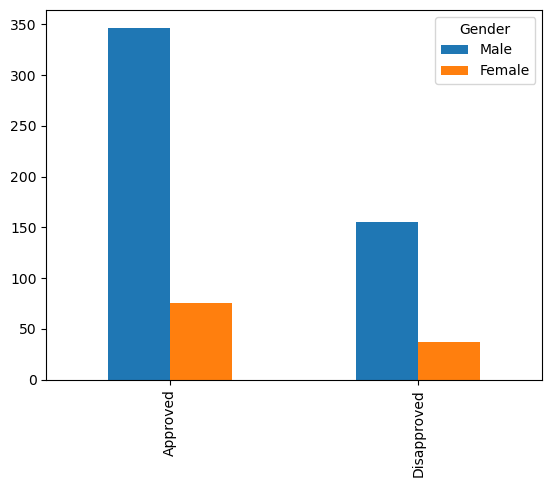

In [16]:
barplot("Gender")

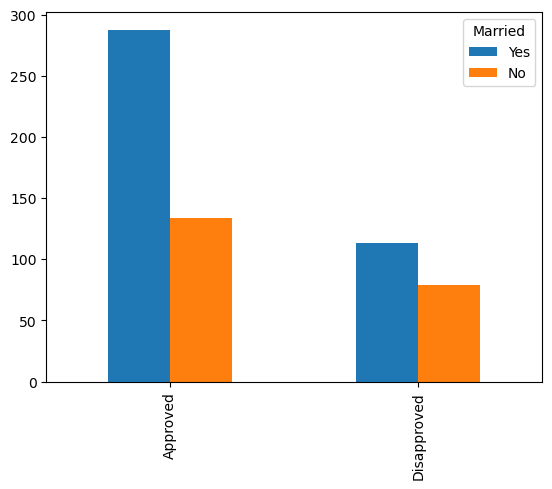

In [17]:
barplot("Married")

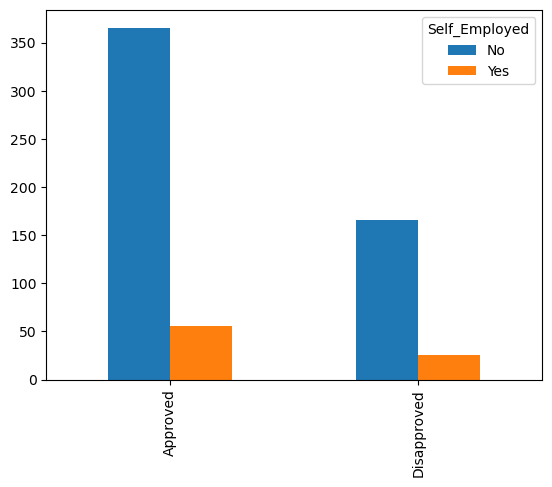

In [18]:
barplot("Self_Employed")

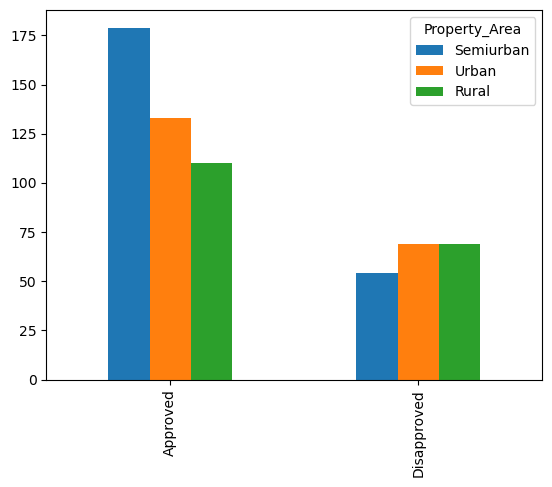

In [19]:
barplot("Property_Area")

# encoding the categorical data

# It can be accessed by ordinal encoding

# From the dataset, the categorical datas are mentioned below

In [20]:
cate = train_data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]

In [21]:
# ordinal encoding

from sklearn.preprocessing import OrdinalEncoder

ordi = OrdinalEncoder()

# ordi.fit_transform(train_data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]).astype(int)

train_data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]] = ordi.fit_transform(train_data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]).astype(int)

In [22]:
train_data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]] 

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,0,0,0
2,1,1,0,1,2,1
3,1,1,1,0,2,1
4,1,0,0,0,2,1
...,...,...,...,...,...,...
609,0,0,0,0,0,1
610,1,1,0,0,0,1
611,1,1,0,0,2,1
612,1,1,0,0,2,1


In [23]:
train_data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]].astype(int)

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,0,0,0
2,1,1,0,1,2,1
3,1,1,1,0,2,1
4,1,0,0,0,2,1
...,...,...,...,...,...,...
609,0,0,0,0,0,1
610,1,1,0,0,0,1
611,1,1,0,0,2,1
612,1,1,0,0,2,1


In [24]:
train_data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [25]:
train_data["Gender"].unique()

array([1, 0])

In [26]:
train_data["LoanAmount"].unique()

array([146.41216216, 128.        ,  66.        , 120.        ,
       141.        , 267.        ,  95.        , 158.        ,
       168.        , 349.        ,  70.        , 109.        ,
       200.        , 114.        ,  17.        , 125.        ,
       100.        ,  76.        , 133.        , 115.        ,
       104.        , 315.        , 116.        , 112.        ,
       151.        , 191.        , 122.        , 110.        ,
        35.        , 201.        ,  74.        , 106.        ,
       320.        , 144.        , 184.        ,  80.        ,
        47.        ,  75.        , 134.        ,  96.        ,
        88.        ,  44.        , 286.        ,  97.        ,
       135.        , 180.        ,  99.        , 165.        ,
       258.        , 126.        , 312.        , 136.        ,
       172.        ,  81.        , 187.        , 113.        ,
       176.        , 130.        , 111.        , 167.        ,
       265.        ,  50.        , 210.        , 175.  

# Finally ordinal encoding done

# Now Training Testing and Splitting the dataset

In [27]:
from sklearn.model_selection import train_test_split
X = train_data.drop("Loan_Status", axis=1)
Y = train_data["Loan_Status"]

In [28]:
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2


In [29]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [30]:
print(X.shape)
print(Y.shape)

(614, 10)
(614,)


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(429, 10)
(185, 10)
(429,)
(185,)


# as our dataset contains categorical inputs, we better use Naive bayes to classify it 

# we better try 3 types of naive bayes to know which bayes model is better 


In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
gg = GaussianNB()

In [35]:
gg.fit(X_train,Y_train)

GaussianNB()

In [36]:
predictor = gg.predict(X_test)

In [37]:
predictor

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
# now we will find the accuracy , precision and recall

In [39]:
from sklearn.metrics import accuracy_score, precision_score,recall_score

def loss_func(Y_true,Y_pred):
    accru = accuracy_score(Y_true,Y_pred)
    precision = precision_score(Y_true,Y_pred)
    recall = recall_score(Y_true,Y_pred)
    
    print(f'Accuracy score: {accru}')
    print(f'Precision Score: {precision}')
    print(f'Recall Score: {recall}')

In [40]:
loss_func(Y_test,predictor)

Accuracy score: 0.8216216216216217
Precision Score: 0.8176100628930818
Recall Score: 0.9701492537313433


In [41]:
# now trying with bernoulli naive bayes

In [42]:
from sklearn.naive_bayes import BernoulliNB

In [43]:
Bernoulli = BernoulliNB()

In [44]:
bbf = Bernoulli.fit(X_train,Y_train)

In [45]:
Bernoulli_prediction = bbf.predict(X_test)

In [46]:
loss_func(Y_test,Bernoulli_prediction)

Accuracy score: 0.827027027027027
Precision Score: 0.8148148148148148
Recall Score: 0.9850746268656716


In [47]:
# now trying with multinomial naive bayesian 
from sklearn.naive_bayes import MultinomialNB


In [48]:
multi = MultinomialNB()

In [49]:
multi_nomial_test = multi.fit(X_train,Y_train)

In [50]:
mulitnomial_predictor = multi_nomial_test.predict(X_test)

In [51]:
mulitnomial_predictor

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1])

In [52]:
# now scores for accuracy, recall and precision are calculated 

loss_func(Y_test,mulitnomial_predictor)


Accuracy score: 0.4810810810810811
Precision Score: 0.7065217391304348
Recall Score: 0.48507462686567165


# lets do some comparison between these three models later 
# Now lets see to implement GridSearchCV and Support Vector Classifiers to implement it

# Implementing Support Vector Classifiers

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC()

# now defining the parameter range
param_grid = {
               'C':[0.1,1,10,100,1000,10000],
                'gamma':[0.0001,0.001,0.01,0.1,1],
                 'kernel':['rbf']
            }

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose = 3)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.663 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.674 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.674 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.674 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.671 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.663 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.674 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.674 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.674 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.671 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.663 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             verbose=3)

In [54]:
grid.best_params_

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [55]:
# after finding the best parameters , we are fitting with the SVC models

In [56]:
svc = SVC(C=0.1,gamma=0.0001,kernel='rbf')
svc.fit(X_train,Y_train)

SVC(C=0.1, gamma=0.0001)

In [57]:
predictor_svc = svc.predict(X_test)

In [58]:
accuracy_score(Y_test,predictor_svc)

0.7243243243243244

In [59]:
loss_func(Y_test,predictor_svc)

Accuracy score: 0.7243243243243244
Precision Score: 0.7243243243243244
Recall Score: 1.0


In [60]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.2/99.8 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.4/99.8 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 0.6/99.8 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 1.1/99.8 MB 4.8 MB/s eta 0:00:21
    --------------------------------------- 1.3/99.8 MB 4.7 MB/s eta 0:00:21
    --------------------------------------- 1.5/99.8 MB 4.9 MB/s eta 0:00:20
    --------------------------------------- 1.7/99.8 MB 4.8 MB/s eta 0:00:21
    ---------------------------

In [61]:
# now we are trying with XgBoost classifier 
from xgboost import XGBClassifier


xgb = XGBClassifier(learning_rate=0.1,
                    n_estimators= 1000,
                    max_depth=3      
                   )

In [62]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
predict_xgboost = xgb.predict(X_test)

In [64]:
predict_xgboost

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
accuracy_score(Y_test,predict_xgboost)

0.8054054054054054

In [66]:
loss_func(Y_test,predict_xgboost)

Accuracy score: 0.8054054054054054
Precision Score: 0.8402777777777778
Recall Score: 0.9029850746268657


In [67]:
# now trying decision tree with randomized search

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
# now we are trying with default values of decision tree classifier 

In [70]:
tree = DecisionTreeClassifier()

In [71]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [72]:
predictor_decisiontree = tree.predict(X_test)

In [73]:
accuracy_score(Y_test,predictor_decisiontree)

0.7837837837837838

In [74]:
loss_func(Y_test,predictor_decisiontree)

Accuracy score: 0.7837837837837838
Precision Score: 0.8405797101449275
Recall Score: 0.8656716417910447


In [75]:
# now training with random forest


In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
random_forest = RandomForestClassifier(n_estimators=10,max_depth=7)

In [78]:
random_Forest_train = random_forest.fit(X_train,Y_train)

In [79]:
randomforest_predictor = random_Forest_train.predict(X_test)

In [80]:
loss_func(Y_test,randomforest_predictor)

Accuracy score: 0.8162162162162162
Precision Score: 0.8246753246753247
Recall Score: 0.9477611940298507


# Comparing The algorithms, we are tabulating the accuracy here

## NaiveBayes has 3 naive bayes, the results of naive bayes are depicted below:
### Gaussian Naive Bayes = 82.1% ( works well when inputs are not discrete, like when inputs are continous ) 
### Bernoulli Naive Bayes = 82.7% (works well when inputs are in boolean form)
### Multinomial Naive Bayes = 48.1% (works when features follow a multinomial distribution)

## Support Vector Classifier using GridSearchCV = 72.43%
## XGBoost after mentioning essential parameters like Learning Rate = 0.1, n_estimators = 1000 and max_depth = 3
## DecisionTree  = 75.67%
## Randomforest = 81.08 %

In [81]:
# now creating model for pickle to implement in website

In [85]:
import joblib
joblib.dump(Bernoulli_prediction,"model.pkl")
model = joblib.load('model.pkl')

In [86]:
model

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [87]:
import pickle